In [1]:
import os 
from glob import glob 

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 더 적은 쪽을 기준으로 가져온다 
tmp_label_paths = glob('ADE20K_2017_05_30_consistency/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/*_seg.png')

In [3]:
image_paths = []
label_paths = []

for lbl_path in tmp_label_paths:
    img_path = lbl_path.replace('_seg.png', '.jpg')
    if os.path.exists(img_path):  # image path가 있는지 확인하면 담는다
                                  # label path는 이미 glob로 가져왔기 때문에
                                  # label path는 따로 경로 확인 불필요
        image_paths.append(img_path)
        label_paths.append(lbl_path)  # image가 없으면 label에도 담아주면 안 됨
        
len(image_paths), len(label_paths)

(64, 64)

In [4]:
min(len(image_paths), len(label_paths))

64

In [12]:
img_path = image_paths[0]
lbl_path = label_paths[0]

In [13]:
image = np.array(Image.open(img_path))
label = np.array(Image.open(lbl_path))
label.shape

(960, 1280, 3)

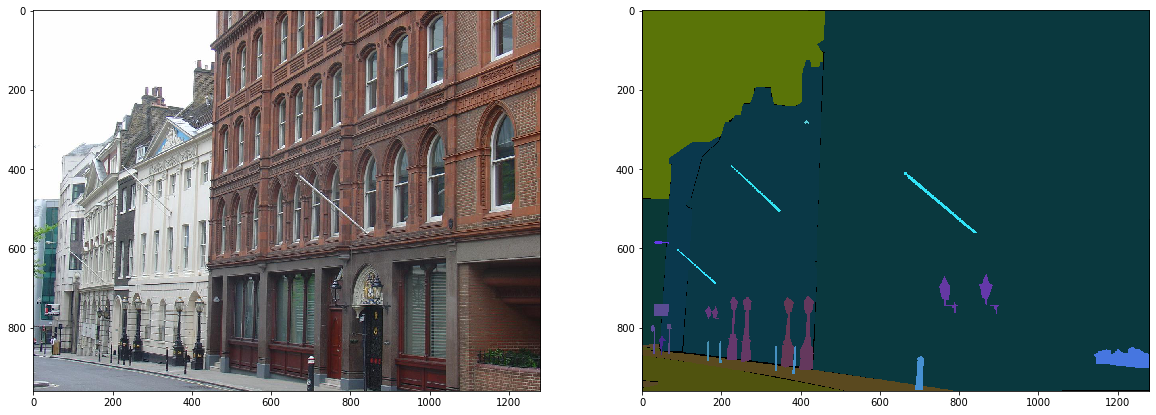

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(label)
plt.show()

Label Data를 열어보니 Channel이 3으로 되어있다 -> 이런 경우 Channel을 의심

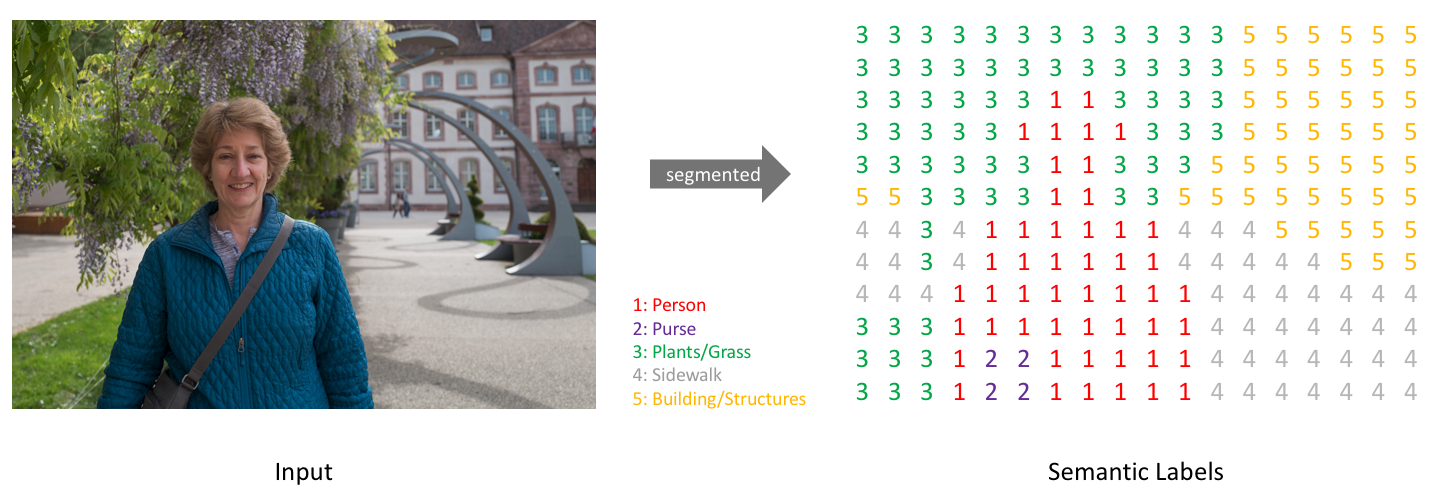

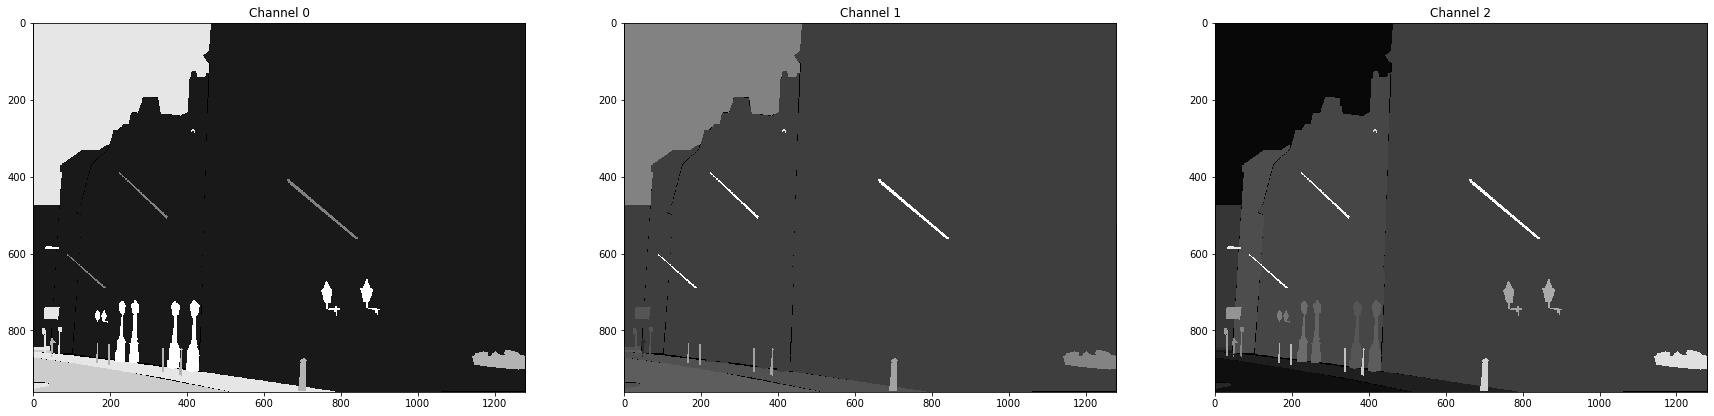

In [26]:
plt.figure(figsize=(30, 10))
for c in range(3):
    plt.subplot(131+c)
    plt.title('Channel %d' % c)
    plt.imshow(label[:, :, c], 'gray')
plt.show()

In [27]:
first_c = label[:, :, 0]
second_c = label[:, :, 1]

In [28]:
np.unique(first_c)

array([  0,  10,  50,  70,  80,  90, 100], dtype=uint8)

In [30]:
np.unique(second_c)

array([  0,  39,  56,  73,  76,  83, 116, 118, 144, 205, 228], dtype=uint8)

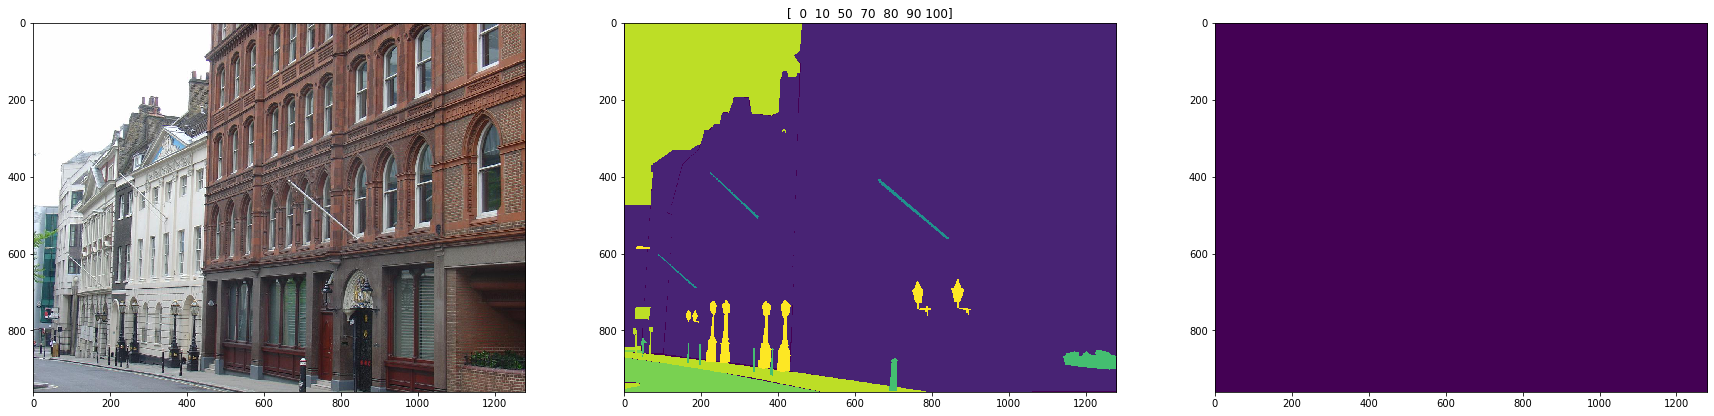

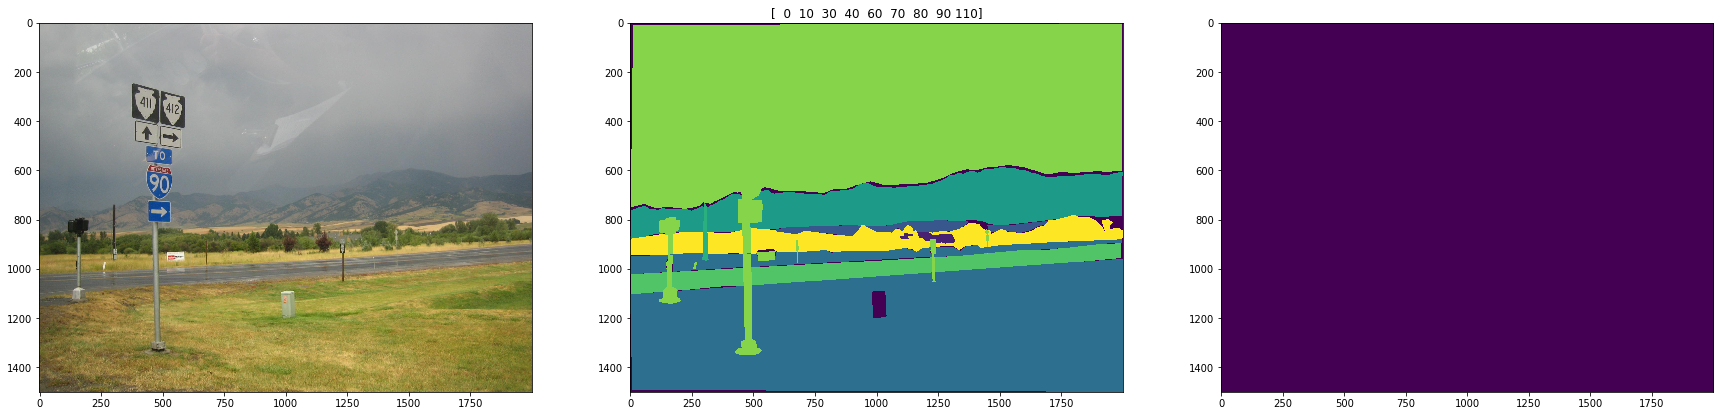

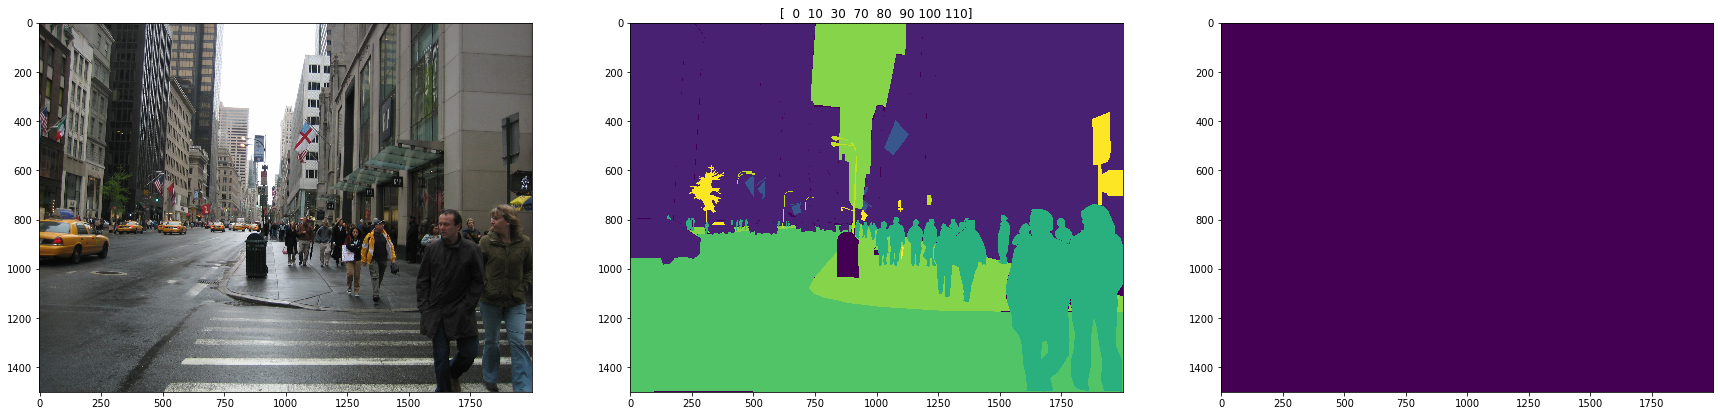

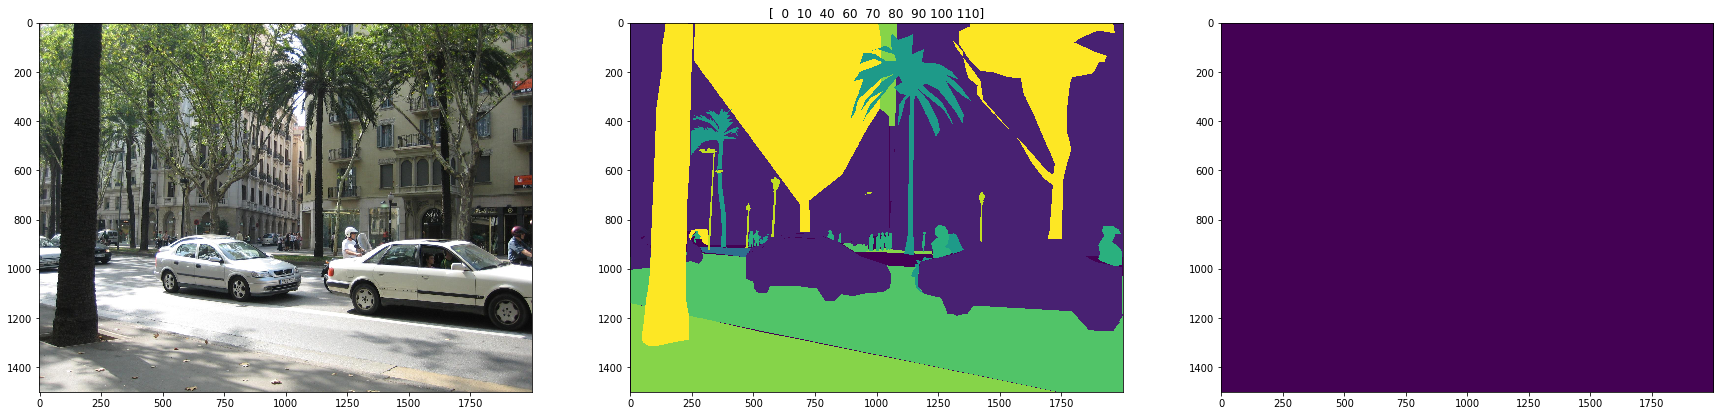

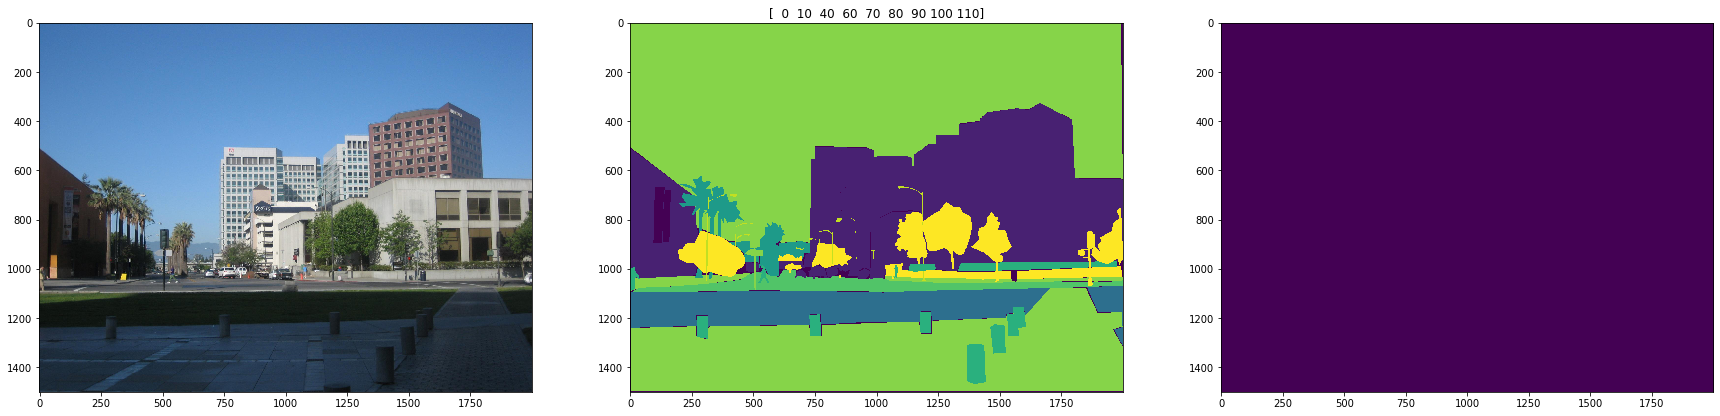

In [51]:
for i in range(5):
    image = np.array(Image.open(image_paths[i]))
    label = np.array(Image.open(label_paths[i]))
    tmp_label = label[:,:,0]
    plt.figure(figsize=(30, 10))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.title(str(np.unique(tmp_label)))
    plt.imshow(tmp_label)
    plt.subplot(133)
    plt.imshow(np.where(tmp_label==39, 1, 0))
    plt.show()

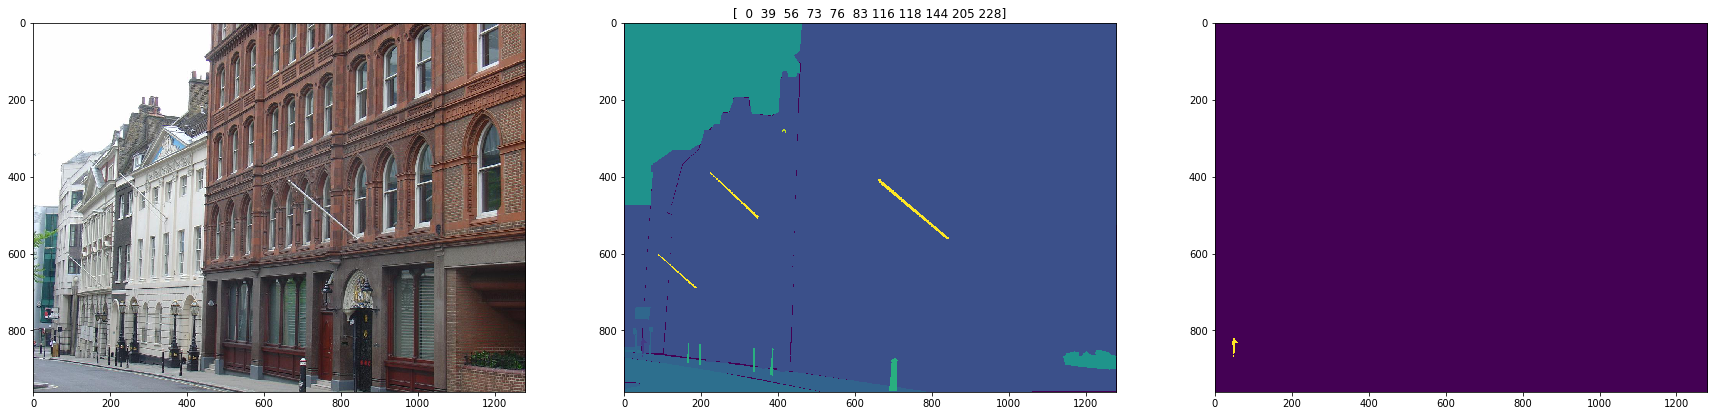

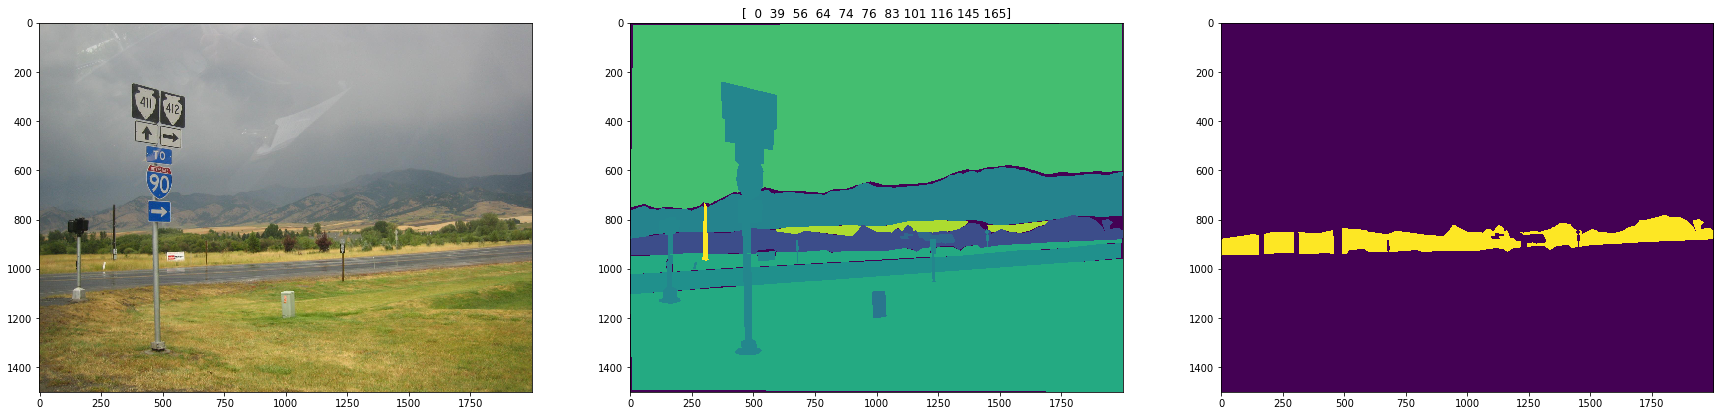

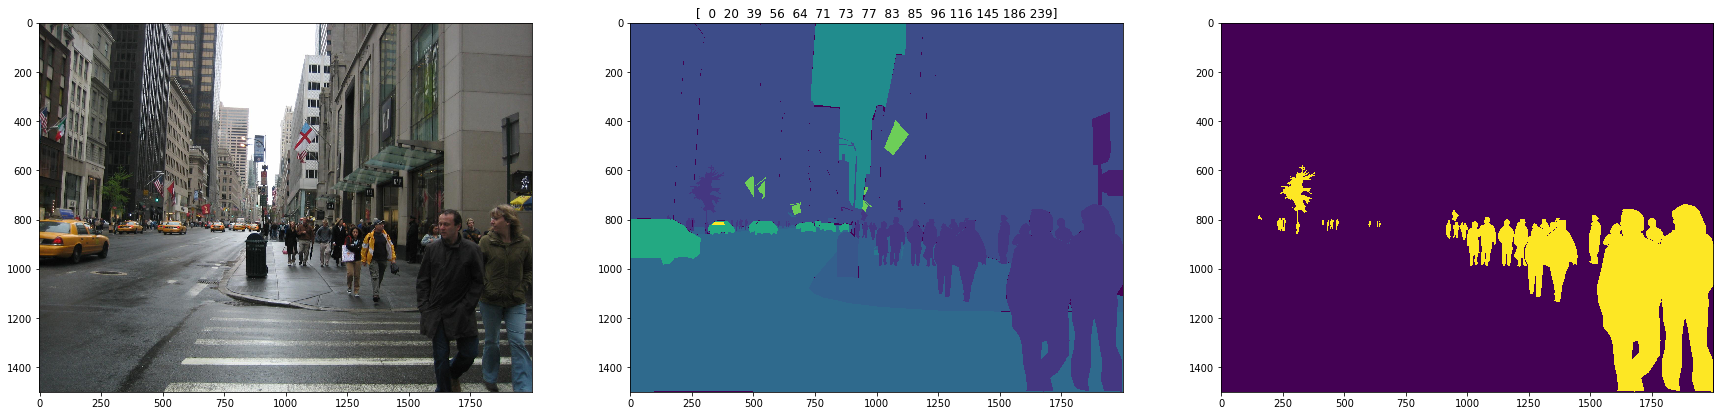

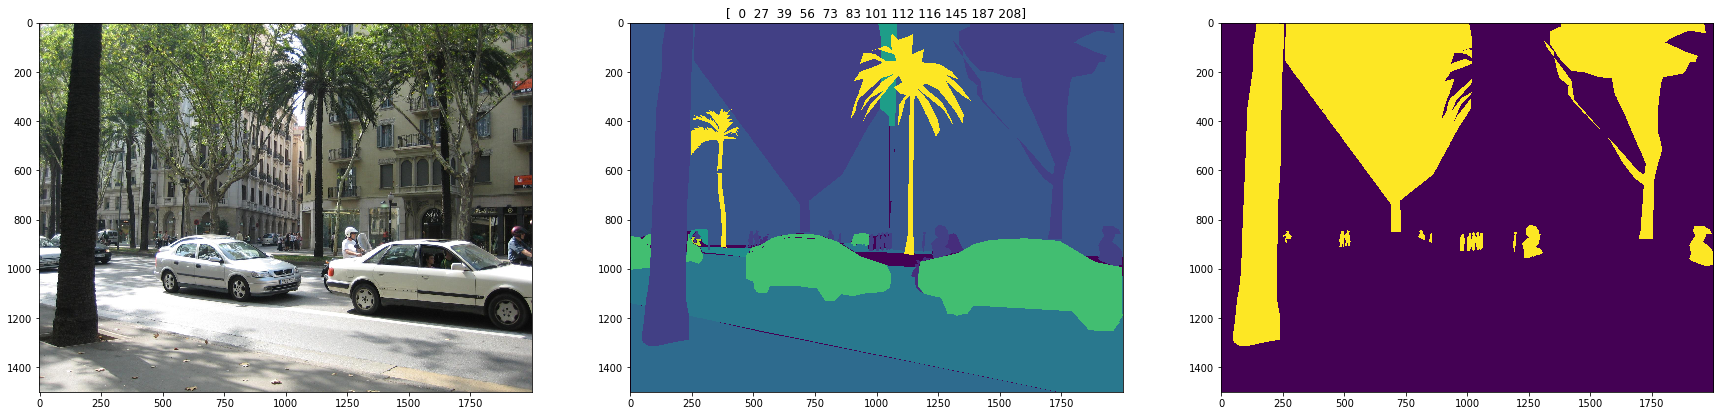

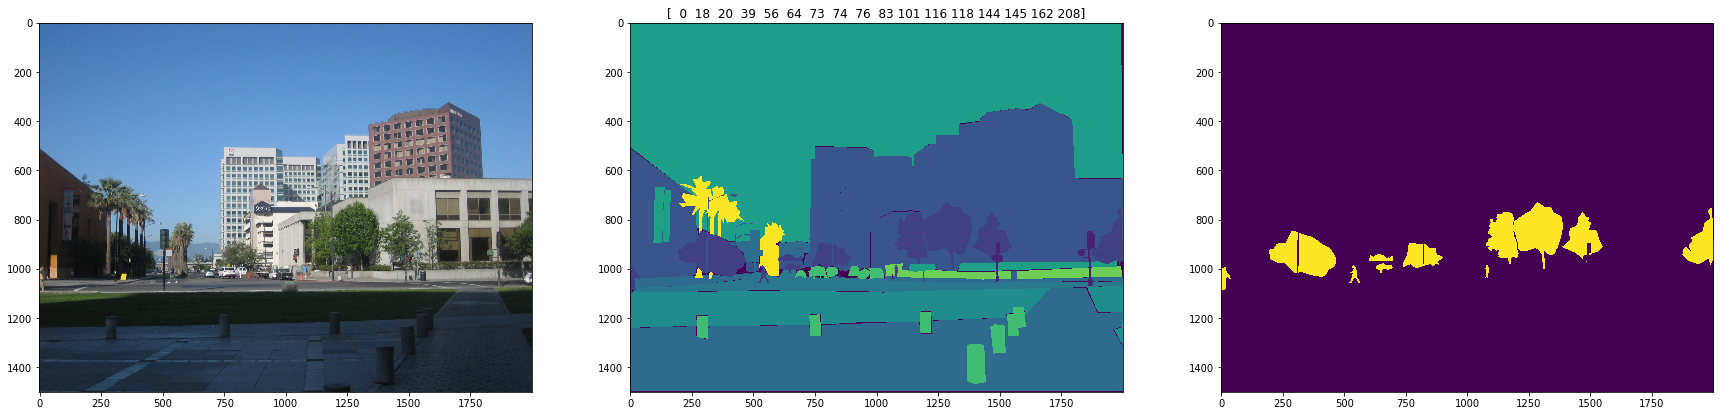

In [52]:
for i in range(5):
    image = np.array(Image.open(image_paths[i]))
    label = np.array(Image.open(label_paths[i]))
    tmp_label = label[:,:,1]
    plt.figure(figsize=(30, 10))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.title(str(np.unique(tmp_label)))
    plt.imshow(tmp_label)
    plt.subplot(133)
    plt.imshow(np.where(tmp_label==39, 1, 0))
    plt.show()

In [44]:
label_channels = np.array(Image.open(lbl_path))
label = label_channels[:,:,0]
label.shape

(960, 1280)

## 어떤 Unique한 Label이 있는지 확인

In [47]:
from tqdm import tqdm_notebook

In [63]:
class_nums = []

for path in tqdm_notebook(label_paths):
    label = np.array(Image.open(path))[:,:,0] // 10
    unique_lbls = np.unique(np.array(label))
    for l in unique_lbls:
        if l not in class_nums:
            class_nums.append(l)

In [64]:
class_nums.sort()

## Label에서 얻은 결과 

In [65]:
class_nums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [66]:
# Label을 얻는 방법 
label = np.array(Image.open(path))[:, :, 0] // 10

C:\Users\June\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


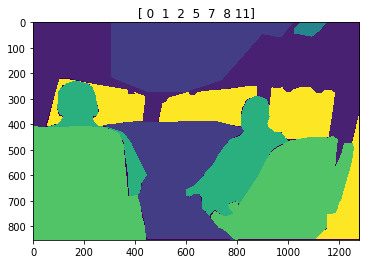

In [68]:
plt.title(np.unique(label))
plt.imshow(label)
plt.show()

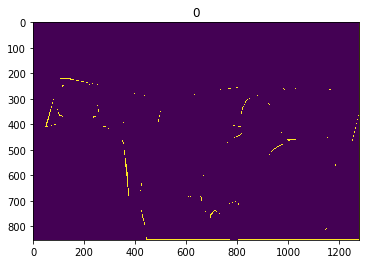

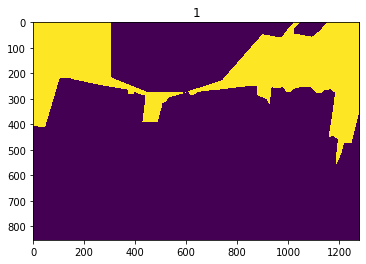

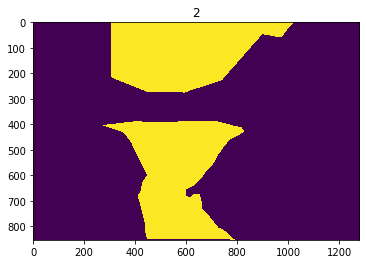

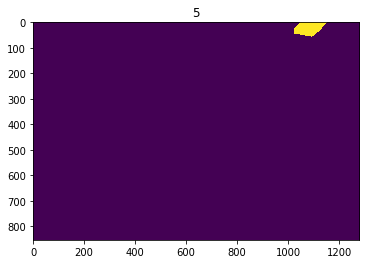

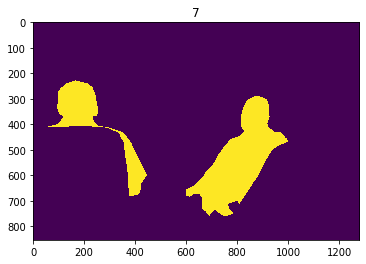

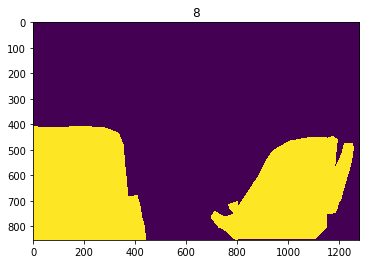

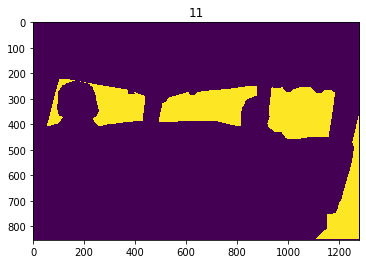

In [70]:
for l in np.unique(label):
    plt.title(l)
    plt.imshow(np.where(label==l, 1, 0))
    plt.show()